In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
include("lattice_BZ.jl")
include("concentrated_BC.jl")

state_coefficients (generic function with 1 method)

<font size="12">Single-Particle Concentrated BC</font>

In [2]:
function eval_sp_bc(qlim, pd, spacing, center, n, w)
    grid = make_hex(center, qlim, qlim / pd)
    sp_curvature = sp_berry_curvature(grid, spacing, n, w)

    fig = Figure(size=(800, 600), fontsize=25)
    ax1 = Axis(fig[1, 1], title = L"\text{Single Particle } \Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], sp_curvature, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], sp_curvature, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)
    fig
end

eval_sp_bc (generic function with 1 method)

In [3]:
# parameters
qlim = 3
pd = 50
spacing = 10^(-4) * (qlim / pd)
w = 1
n = 1

1

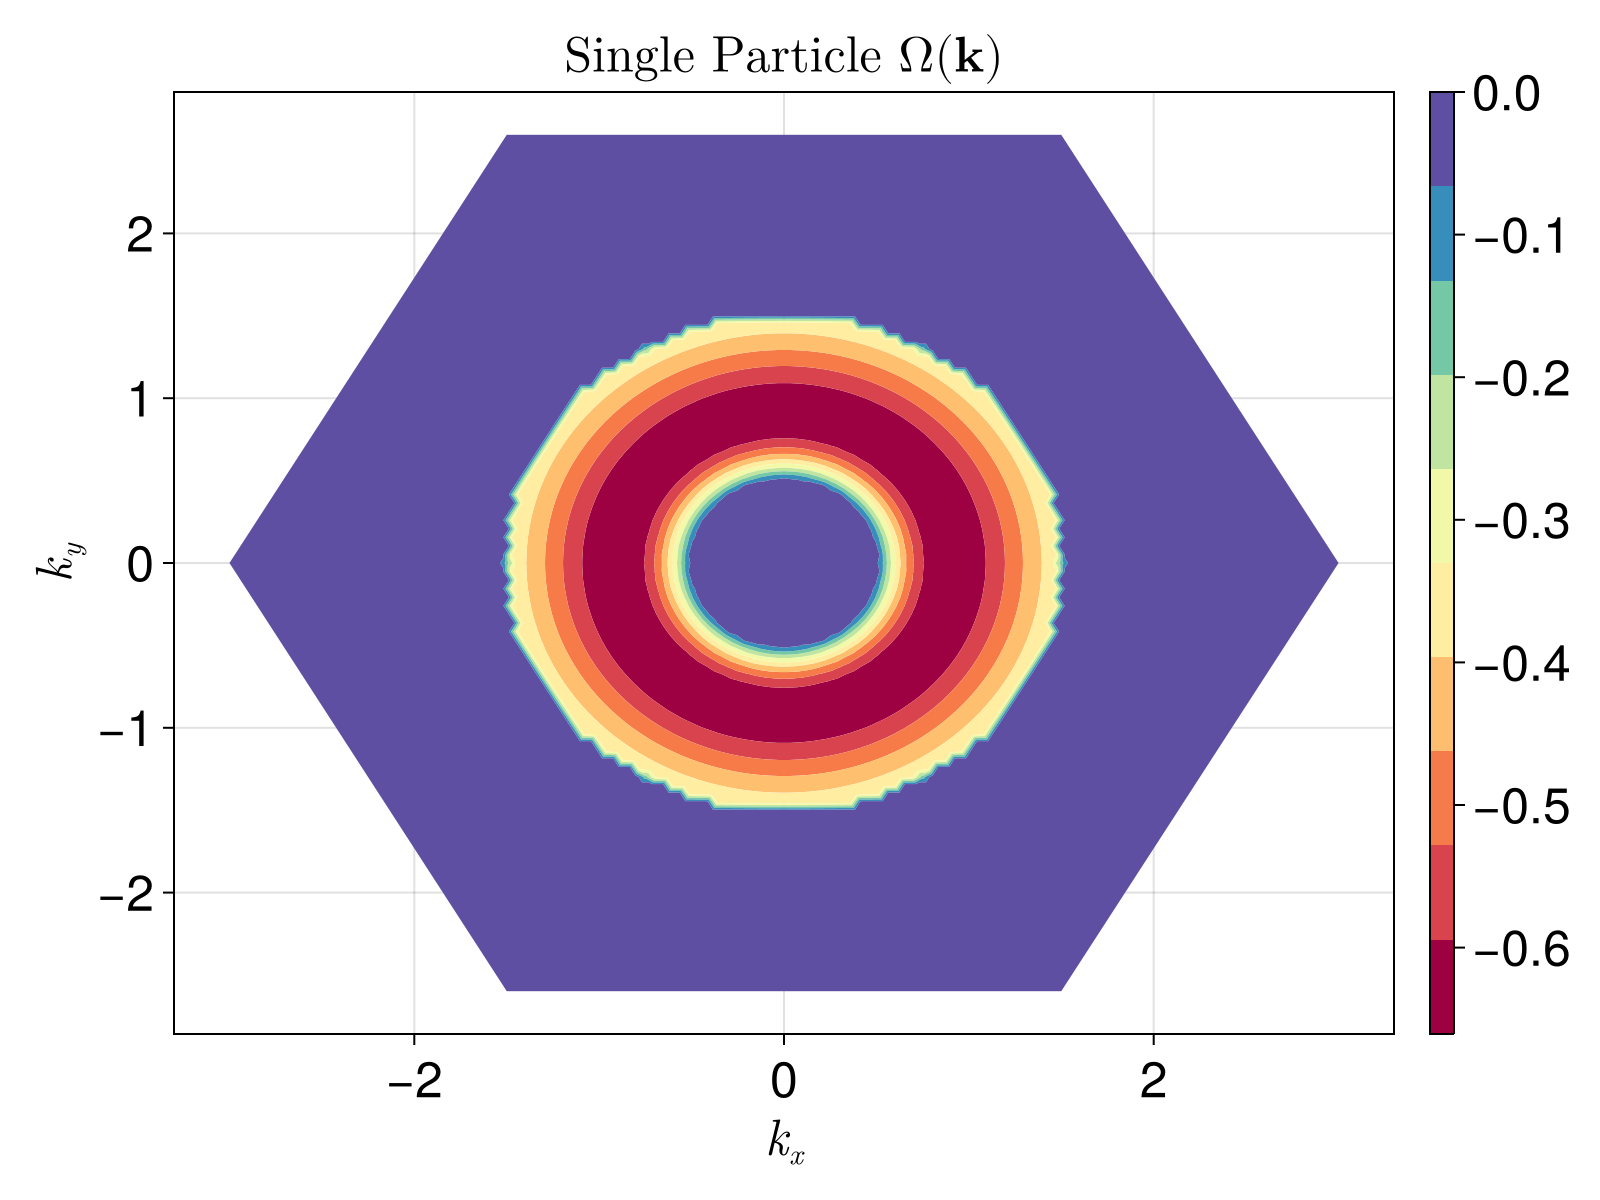

In [4]:
eval_sp_bc(qlim, pd, spacing, [0, 0], n, w)

<font size="12">"Mean-field" Berry Curvature</font>

In [5]:
function eval_mf_bc(qlim, pd, spacing, center, n, w, kappa, vF, delta, alpha)
    println("Inner radius: " * string(1 - w/2))
    println("Outer radius: " * string(1 + w/2))
    grid = make_hex(center, w / 2, w / 2 / pd)
    mf_curvature = mf_berry_curvature(grid, spacing, n, w, vF, kappa, delta, alpha)
    fig = Figure(size=(2000, 800), fontsize=25)
    
    ax1 = Axis(fig[1, 1], title = L"\text{Mean Field } \Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], mf_curvature, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], mf_curvature, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    mom_params = Array{Float64}(undef, size(grid)[1], 2)
    for j in 1:size(grid)[1]
        mom_params[j, 1] = polar_angle(grid[j, 1], grid[j, 2])
        mom_params[j, 2] = norm(grid[j, :])
    end
    
    ax1 = Axis(fig[1, 3], title = L"\theta \text{ vs } \Omega", xlabel = L"\theta", ylabel = L"\Omega")
    lines!(ax1, mom_params[:, 1], mf_curvature)

    fig
end
    

eval_mf_bc (generic function with 1 method)

In [6]:
# parameters
kappa = 1
vF = 0
n = 1
delta = -1
alpha = 503 - 503im
w = 10^(-3) * kappa
pd = 50
spacing = 10^(-4) * (w / 2 / pd)

1.0e-9

Inner radius: 0.9995
Outer radius: 1.0005


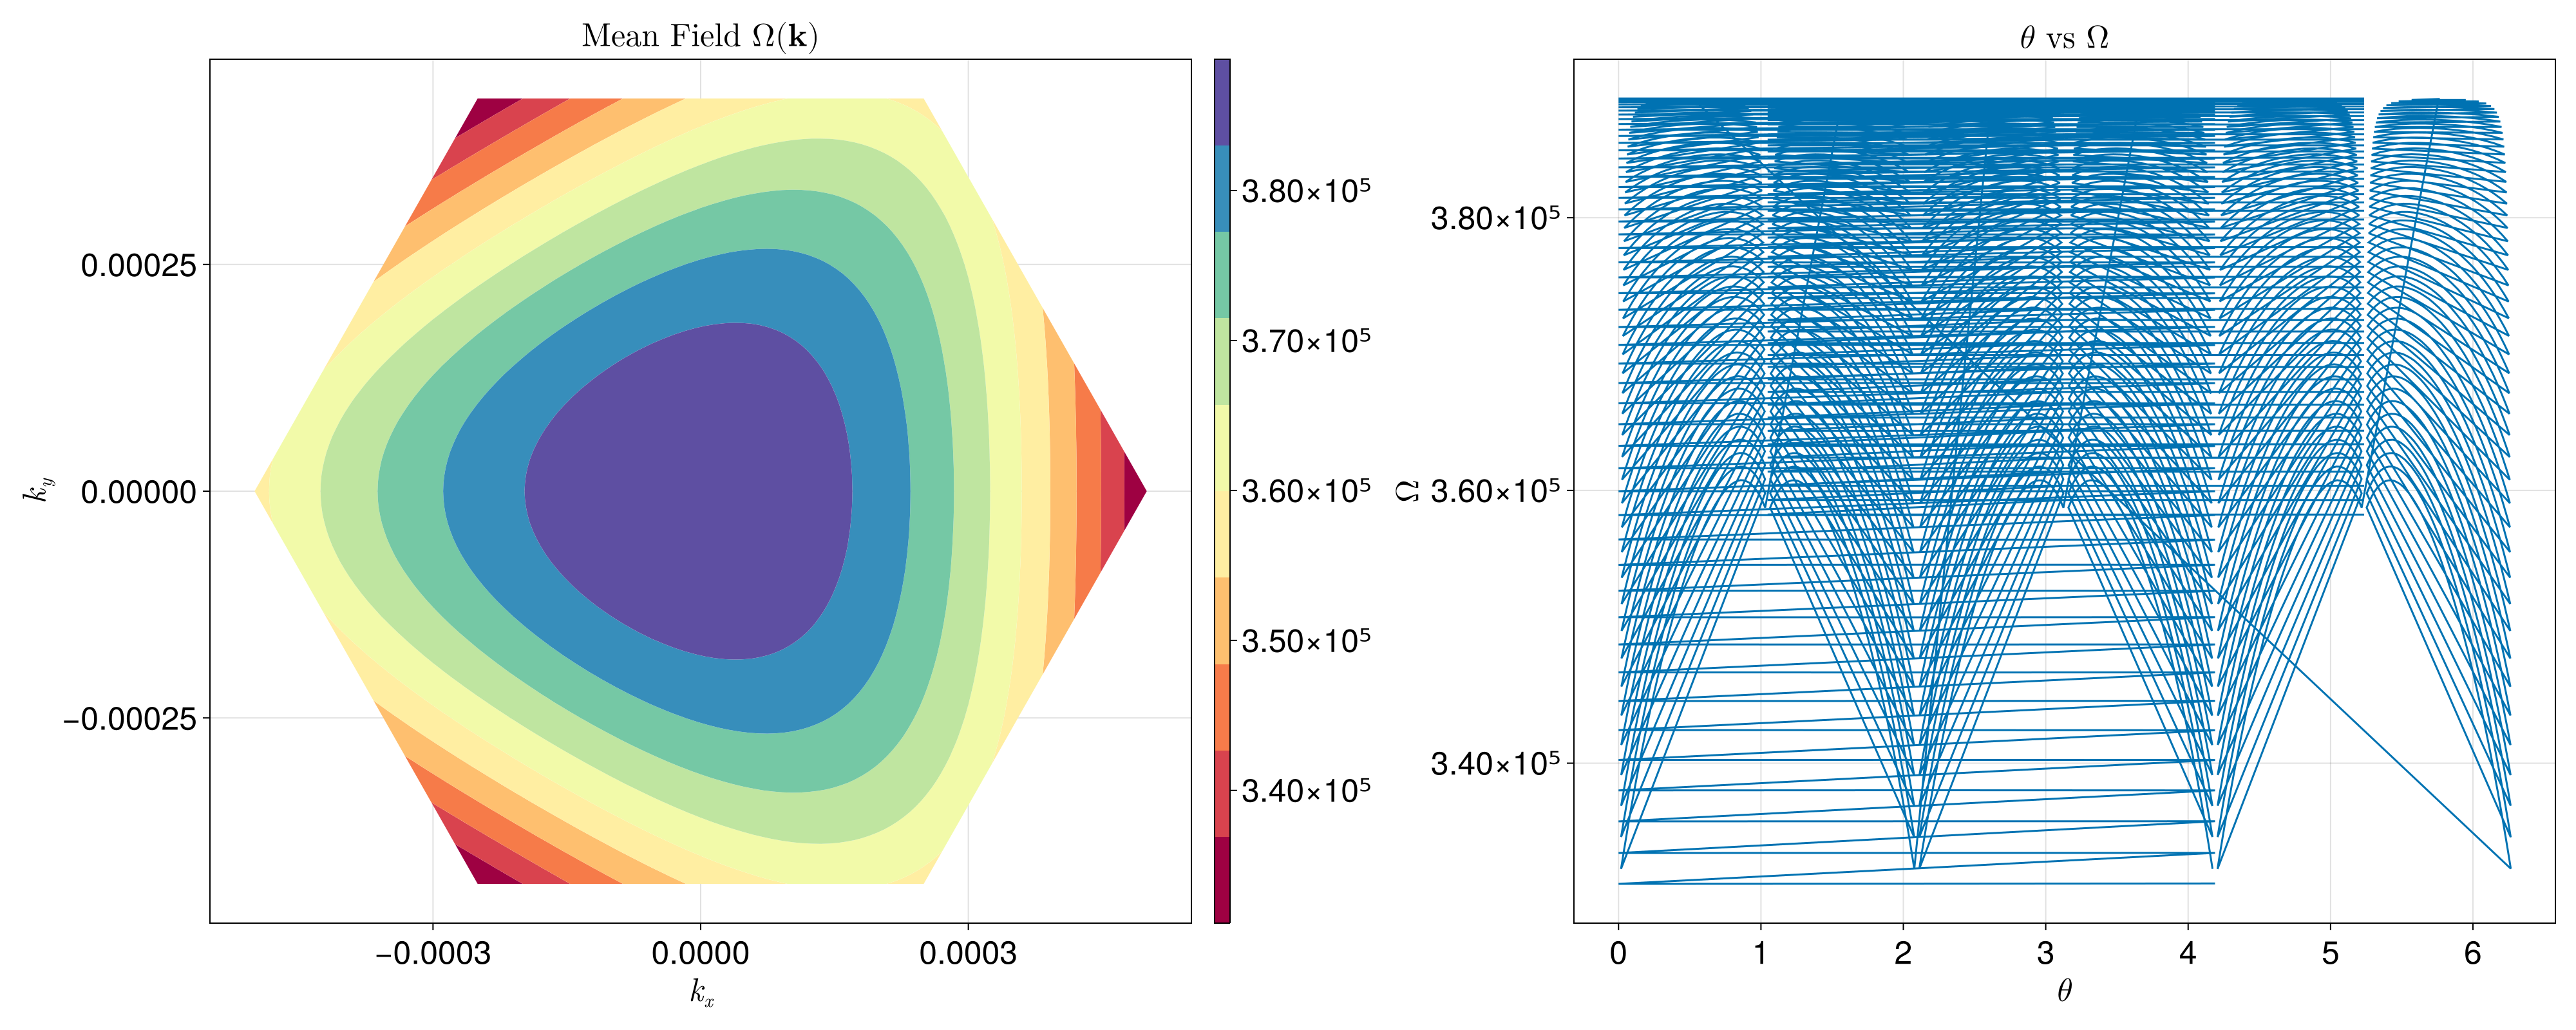

In [7]:
eval_mf_bc(qlim, pd, spacing, [0, 0], n, w, kappa, vF, delta, alpha)

<font size="12">MF BC Comparison</font>

In [8]:
function eval_mf_bc_comp(qlim, pd, spacing, center, n, w, kappa, vF, delta, alpha)
    grid = make_hex(center, w / 2, w / 2 / pd)
    mf_curvature = mf_berry_curvature(grid, spacing, n, w, vF, kappa, delta, alpha)
    no_mf_curvature = mf_berry_curvature(grid, spacing, n, w, vF, kappa, 0, 0)
    folded_sp_curvature = mf_berry_curvature(grid, spacing, n, w, vF, kappa, 0, 0, true)

    fig = Figure(size=(2400, 600), fontsize=25)

    ax1 = Axis(fig[1, 1], title = L"\text{Mean Field } \Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], mf_curvature, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], mf_curvature, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax2 = Axis(fig[1, 3], title = L"\text{Pure Kinetic } \Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], no_mf_curvature, colormap = :Spectral)
    X, ax2, tr2 = tricontourf(grid[:, 1], grid[:, 2], no_mf_curvature, colormap = :Spectral)
    cb2 = Colorbar(fig[1, 4], tr2)

    ax3 = Axis(fig[1, 5], title = L"\text{Single Particle } \Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax3, grid[:, 1], grid[:, 2], folded_sp_curvature, colormap = :Spectral)
    X, ax3, tr3 = tricontourf(grid[:, 1], grid[:, 2], folded_sp_curvature, colormap = :Spectral)
    cb3 = Colorbar(fig[1, 6], tr3)

    fig
end

eval_mf_bc_comp (generic function with 1 method)

In [9]:
# parameters
kappa = 1
vF = 1
n = 1
# note that we want to fix delta < 0 to get non-degenerate GS
delta = -1
# switching the sign of alpha increases or decreases berry curvature
alpha = 1 - 10im
w = 10^(-3) * kappa
pd = 50
spacing = 10^(-4) * (w / 2 / pd)

1.0e-9

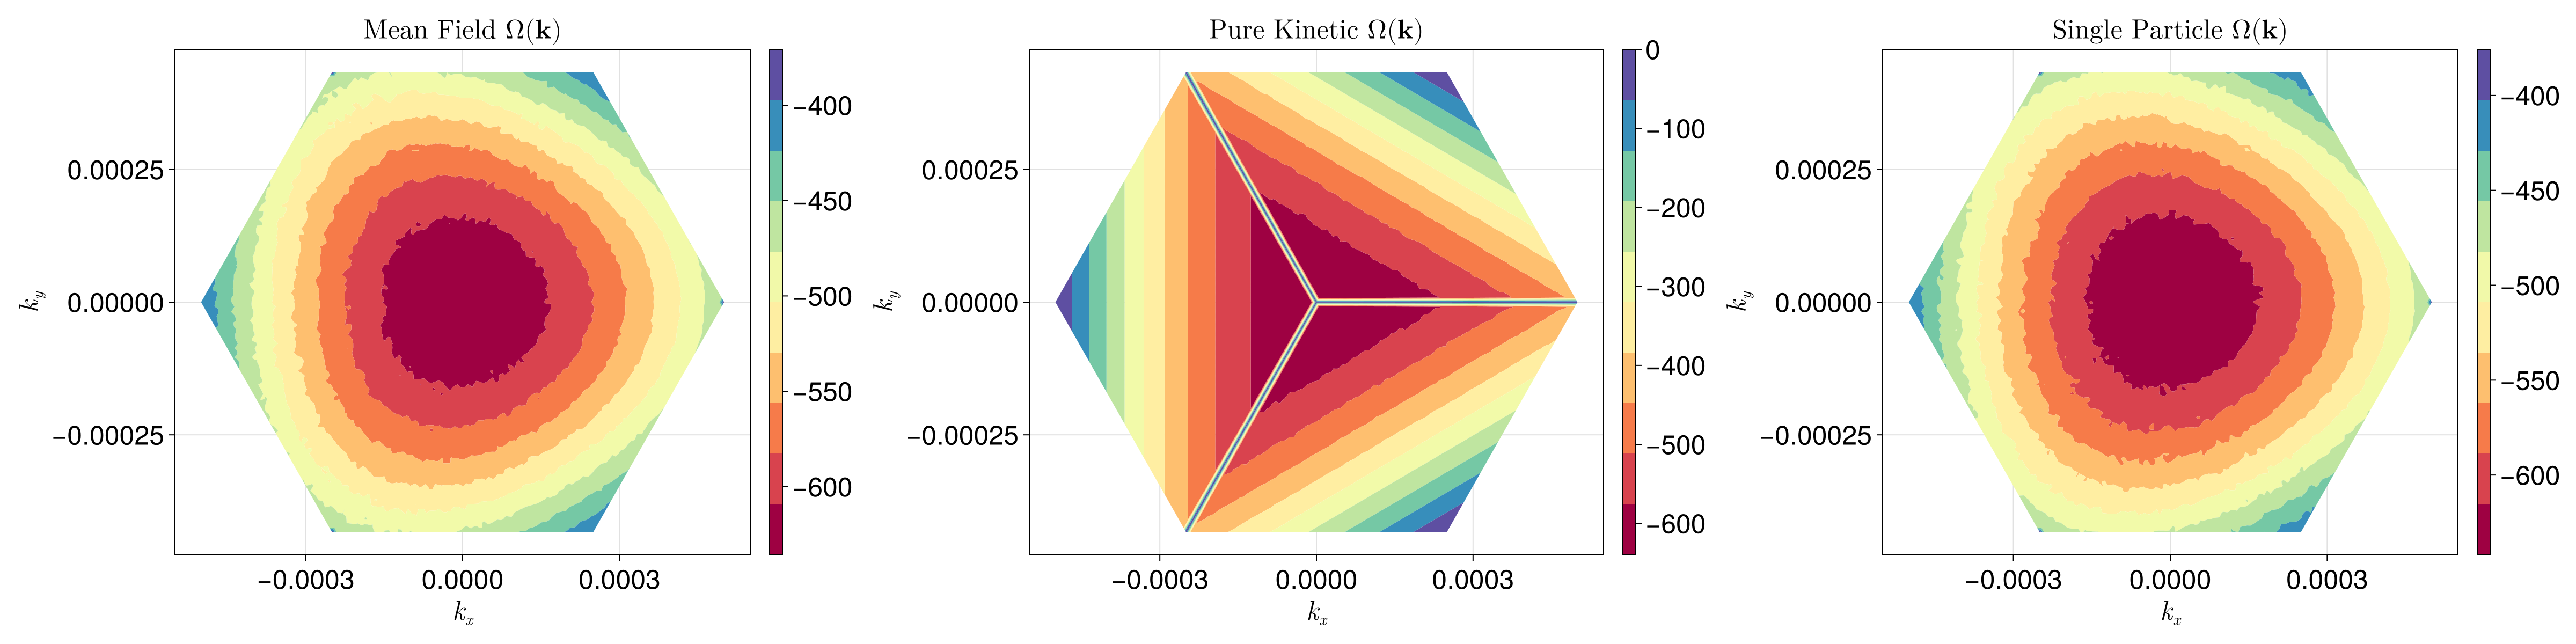

In [10]:
eval_mf_bc_comp(qlim, pd, spacing, [0, 0], n, w, kappa, vF, delta, alpha)

<font size="12">Perturbation Theory Berry Curvature</font>

In [11]:
function pt_bc_comp(pd, n, w, kappa, vF, delta, alpha, theta)
    # alpha dependence
    p = w / 2 / kappa
    x = p * cos(theta)
    y = p * sin(theta)

    spacing = 10^(-4) * (p * kappa / pd)
    grid = reshape([x, y], (1, 2))

    alpha_list = range(-510, 510, 1000)
    re_alpha_curvatures = Array{Float64}(undef, length(alpha_list))
    re_alpha_mathematica = Array{Float64}(undef, length(alpha_list))
    im_alpha_curvatures = Array{Float64}(undef, length(alpha_list))
    im_alpha_mathematica = Array{Float64}(undef, length(alpha_list))
    for i in 1:length(alpha_list)
        r_alph = alpha_list[i] - 503im
        i_alph = alpha_list[i]im + 503

        re_alpha_curvatures[i] = mf_berry_curvature(grid, spacing, n, w, vF, kappa, delta, r_alph)[1]
        re_alpha_mathematica[i] = BC_PT(r_alph, delta, n, w, p, theta)

        im_alpha_curvatures[i] = mf_berry_curvature(grid, spacing, n, w, vF, kappa, delta, i_alph)[1]
        im_alpha_mathematica[i] = BC_PT(i_alph, delta, n, w, p, theta)
    end

    # delta dependence
    delta_list = range(-20, -1, 100)
    delta_curvatures = Array{Float64}(undef, length(delta_list))
    delta_mathematica = Array{Float64}(undef, length(delta_list))
    for i in 1:length(delta_list)
        delta_curvatures[i] = mf_berry_curvature(grid, spacing, n, w, vF, kappa, delta_list[i], alpha)[1]
        delta_mathematica[i] = BC_PT(alpha, delta_list[i], n, w, p, theta)
    end

    # n dependence
    n_list = range(1, 100, 100)
    n_curvatures = Array{Float64}(undef, length(n_list))
    n_mathematica = Array{Float64}(undef, length(n_list))
    for i in 1:length(n_list)
        n_curvatures[i] = mf_berry_curvature(grid, spacing, n_list[i], w, vF, kappa, delta, alpha)[1]
        n_mathematica[i] = BC_PT(alpha, delta, n_list[i], w, p, theta)
    end
    
    # w dependence
    w_list = range(10^(-6) * kappa, 10^(-4) * kappa, 1000)
    w_curvatures = Array{Float64}(undef, length(w_list))
    w_mathematica = Array{Float64}(undef, length(w_list))
    for i in 1:length(w_list)
        w_t = w_list[i]
        
        p_t = w_t / 2 / kappa

        x_t = p_t * cos(theta)
        y_t = p_t * sin(theta)

        spacing_t = 10^(-4) * (p_t / kappa / pd)
        grid_t = reshape([x_t, y_t], (1, 2))

        
        w_curvatures[i] = mf_berry_curvature(grid_t, spacing_t, n, w, vF, kappa, delta, alpha)[1]
        w_mathematica[i] = BC_PT(alpha, delta, n, w_t, p_t, theta)
    end

    # q dependence
    p_list = range(w / 1000 / kappa, w / 2 / kappa, 100)
    p_curvatures = Array{Float64}(undef, length(p_list))
    p_mathematica = Array{Float64}(undef, length(p_list))
    for i in 1:length(p_list)
        x_t = p_list[i] * cos(theta)
        y_t = p_list[i] * sin(theta)

        spacing_t = 10^(-4) * (p_list[i] / kappa / pd)
        grid_t = reshape([x, y], (1, 2))

        p_curvatures[i] = mf_berry_curvature(grid_t, spacing_t, n, w, vF, kappa, delta, alpha)[1]
        p_mathematica[i] = BC_PT(alpha, delta, n, w, p_list[i], theta)
    end

    # create plot
    P = Figure(size=(2200, 1000), fontsize=30)

    # create and configure axes
    ax1 = Axis(P[1, 1], title = L"Re(\alpha) \text{ vs } \Omega \text{ for } Im(\alpha) = -503", xlabel = L"Re(\alpha)", ylabel = L"\Omega")
    lines!(ax1, alpha_list, re_alpha_curvatures, label = "ED")
    lines!(ax1, alpha_list, re_alpha_mathematica, label = "PT")

    ax1 = Axis(P[2, 1], title = L"Im(\alpha) \text{ vs } \Omega \text{ for } Re(\alpha) = 503", xlabel = L"Im(\alpha)", ylabel = L"\Omega")
    lines!(ax1, alpha_list, im_alpha_curvatures, label = "ED")
    lines!(ax1, alpha_list, im_alpha_mathematica, label = "PT")

    ax1 = Axis(P[1, 2], title = L"\Delta \text{ vs } \Omega", xlabel = L"\Delta", ylabel = L"\Omega")
    lines!(ax1, delta_list, delta_curvatures, label = "ED")
    lines!(ax1, delta_list, delta_mathematica, label = "PT")

    ax1 = Axis(P[2, 2], title = L"n \text{ vs } \Omega", xlabel = L"n", ylabel = L"\Omega")
    lines!(ax1, n_list, n_curvatures, label = "ED")
    lines!(ax1, n_list, n_mathematica, label = "PT")

    ax1 = Axis(P[1, 3], title = L"w \text{ vs } \Omega", xlabel = L"w", ylabel = L"\Omega")
    lines!(ax1, w_list, w_curvatures, label = "ED")
    lines!(ax1, w_list, w_mathematica, label = "PT")

    ax1 = Axis(P[2, 3], title = L"p \text{ vs } \Omega", xlabel = L"p", ylabel = L"\Omega")
    lines!(ax1, p_list, p_curvatures, label = "ED")
    lines!(ax1, p_list, p_mathematica, label = "PT")

    P[1, 4] = Legend(P, ax1, framevisible = true)

    ax = Axis(P[:, :], title = L"\theta = \frac{\pi}{4} \text{, } |\kappa| = 1", titlegap = 80)
    hidedecorations!(ax, label = false)
    hidespines!(ax)

    P
end


pt_bc_comp (generic function with 1 method)

In [12]:
# parameters
theta = pi/4
kappa = 1
vF = 0
n = 1
delta = -1
w = 10^(-4) * kappa
pd = 50
alpha = 503 - 503im

503 - 503im

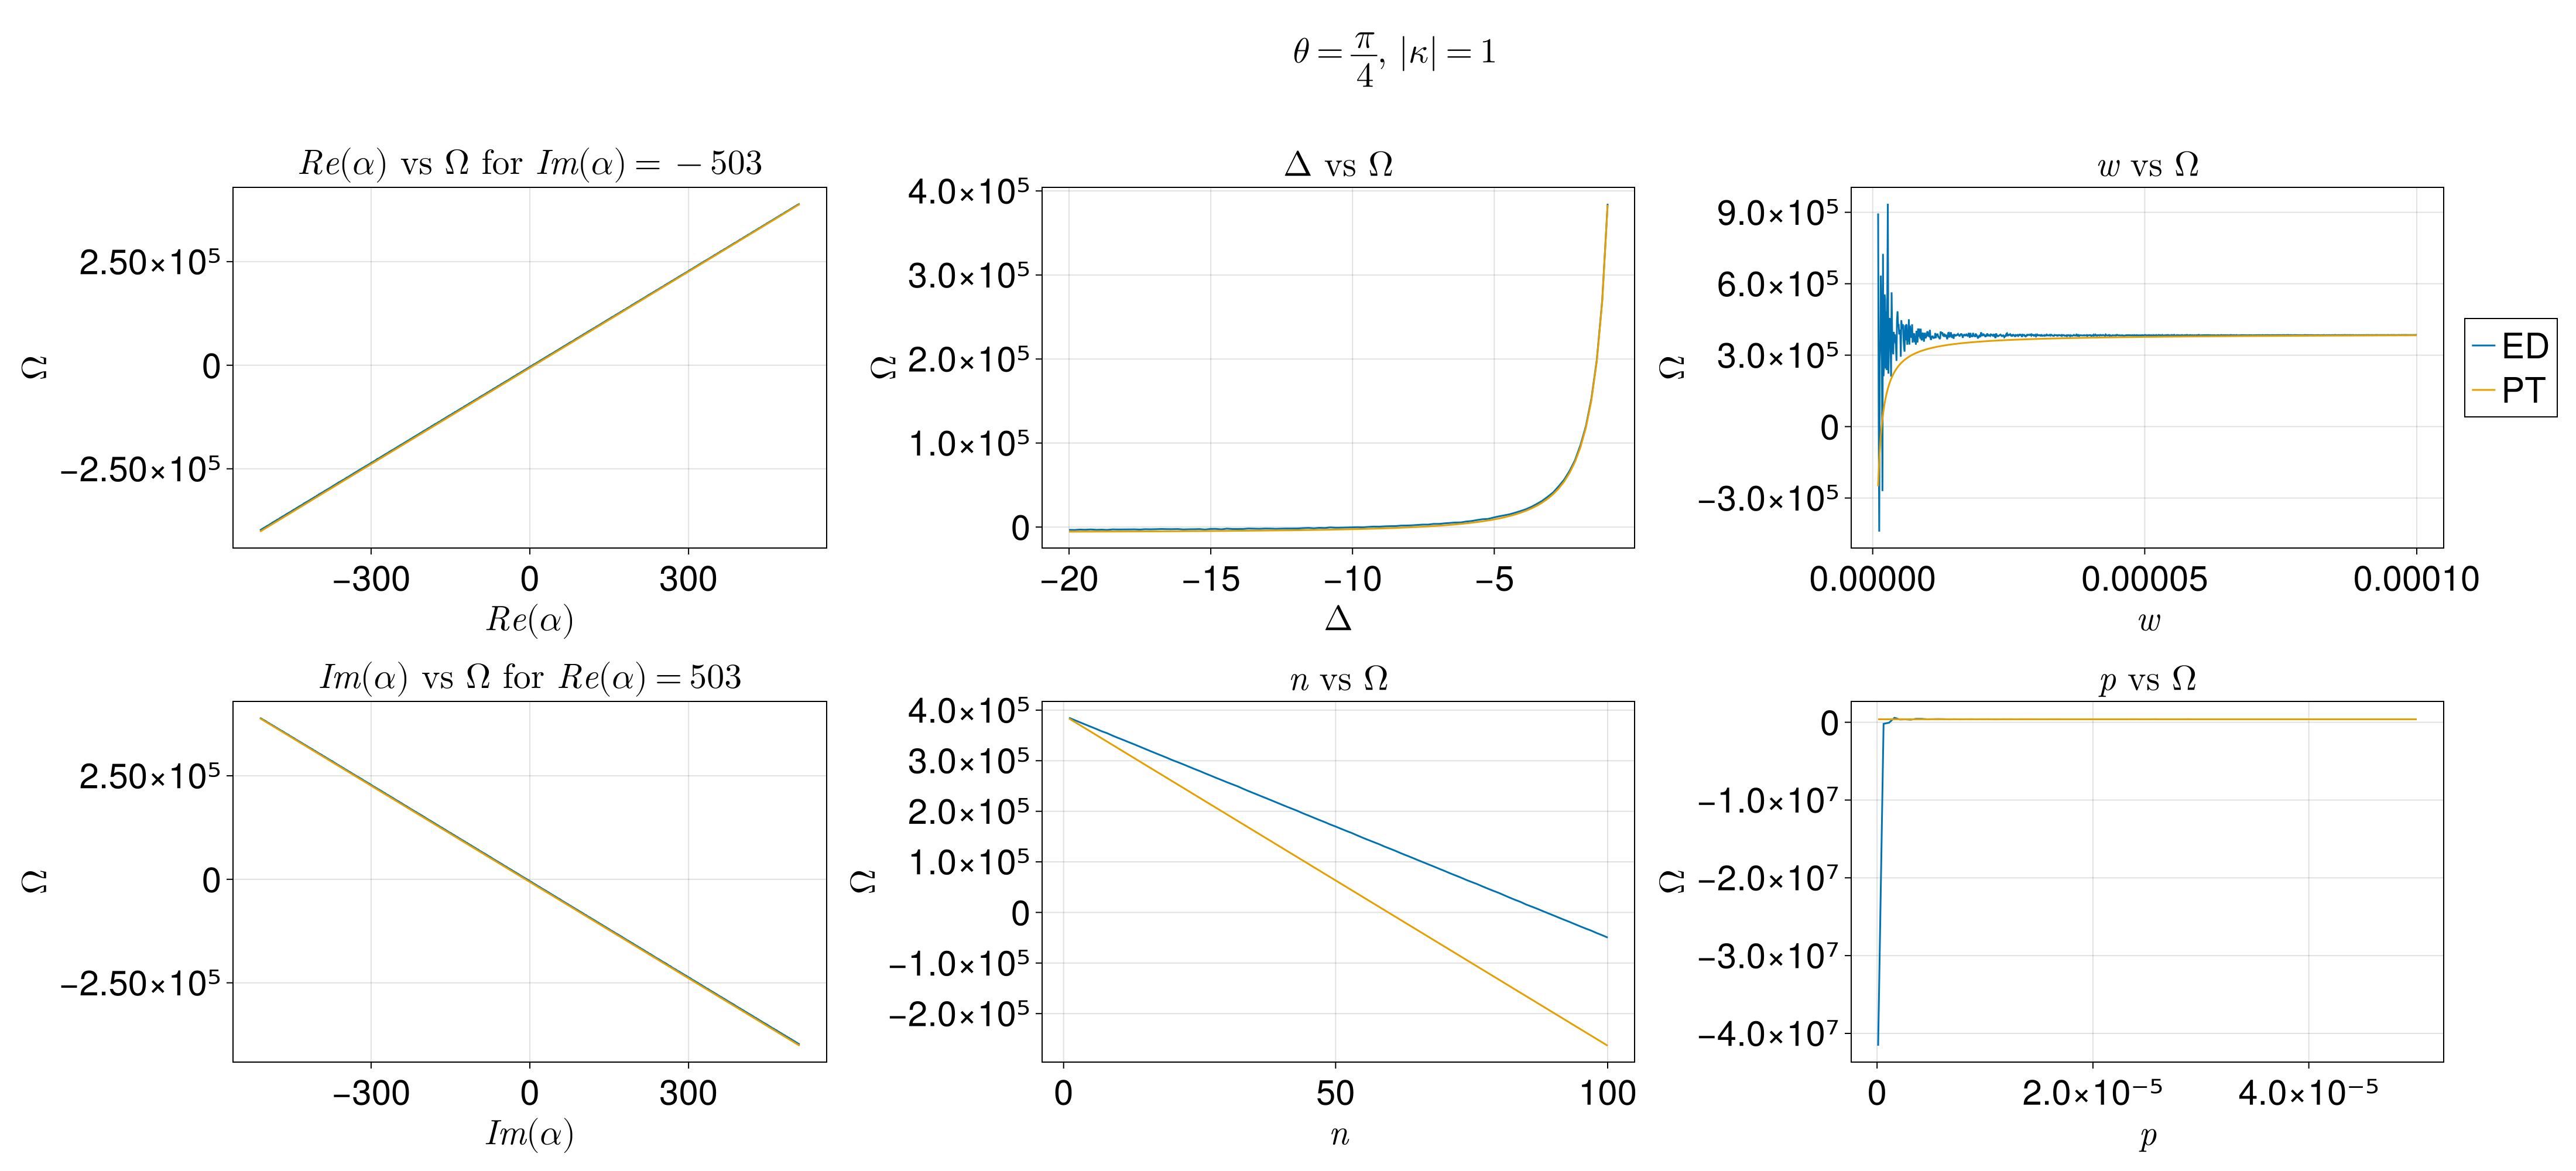

In [13]:
pt_bc_comp(pd, n, w, kappa, vF, delta, alpha, theta)

<font size="12">MF BC No Spinors</font>

In [14]:
function mf_coefs_no_spinor(p, kappa, alpha, delta)
    theta_list = range(0, 2*pi, 100)
    # eigenvector coefficients
    mft_coeffs = Array{ComplexF64}(undef, length(theta_list), 3, 3)
    mft_eigenvalues = Array{Float64}(undef, length(theta_list), 3)
    for j in 1:length(theta_list)
        theta = theta_list[j]
        for index in 1:3
            mft_coeffs[j, index, :], mft_eigenvalues[j, :] = state_coefficients(p, theta, kappa, alpha, delta, index)
        end
    end
    c1_sq = abs.(mft_coeffs[:, :, 1]).^2
    c2_sq = abs.(mft_coeffs[:, :, 2]).^2
    c3_sq = abs.(mft_coeffs[:, :, 3]).^2

    phase_2 = angle.(mft_coeffs[:, :, 2] ./ mft_coeffs[:, :, 1]) ./ pi
    phase_3 = angle.(mft_coeffs[:, :, 3] ./ mft_coeffs[:, :, 1]) ./ pi

    # create plot
    P = Figure(size=(2000, 1000), fontsize=30)

    ax1 = Axis(P[1, 1], xlabel = L"\theta", ylabel = L"{|C|}^2")
    lines!(ax1, theta_list, c1_sq[:, 1], label = L"C_1")
    lines!(ax1, theta_list, c2_sq[:, 1], label = L"C_2")
    lines!(ax1, theta_list, c3_sq[:, 1], label = L"C_3")

    P[1, 2] = Legend(P, ax1, framevisible = true)



    ax1 = Axis(P[2, 1], xlabel = L"\theta", ylabel = L"Arg(\frac{C_{2/3}}{C_1})")
    lines!(ax1, theta_list, phase_3[:, 1], label = L"C_3")
    lines!(ax1, theta_list, phase_2[:, 1], label = L"C_2")


    P[2, 2] = Legend(P, ax1, framevisible = true)


    ax1 = Axis(P[3, 1], xlabel = L"\theta", ylabel = L"E")
    lines!(ax1, theta_list, mft_eigenvalues[:, 1], label = L"E_1")
    lines!(ax1, theta_list, mft_eigenvalues[:, 2], label = L"E_2")
    lines!(ax1, theta_list, mft_eigenvalues[:, 3], label = L"E_3")

    P[3, 2] = Legend(P, ax1, framevisible = true)

    ax = Axis(P[:, :], title = L"\text{Evolution of Eigenvectors}", titlegap = 60)
    hidedecorations!(ax, label = false)
    hidespines!(ax)

    P
end

mf_coefs_no_spinor (generic function with 1 method)

In [15]:
kappa = 1
vF = 0
delta = -10^-5
alpha = 1im
w = 10^(-4) * kappa
p = 1

1

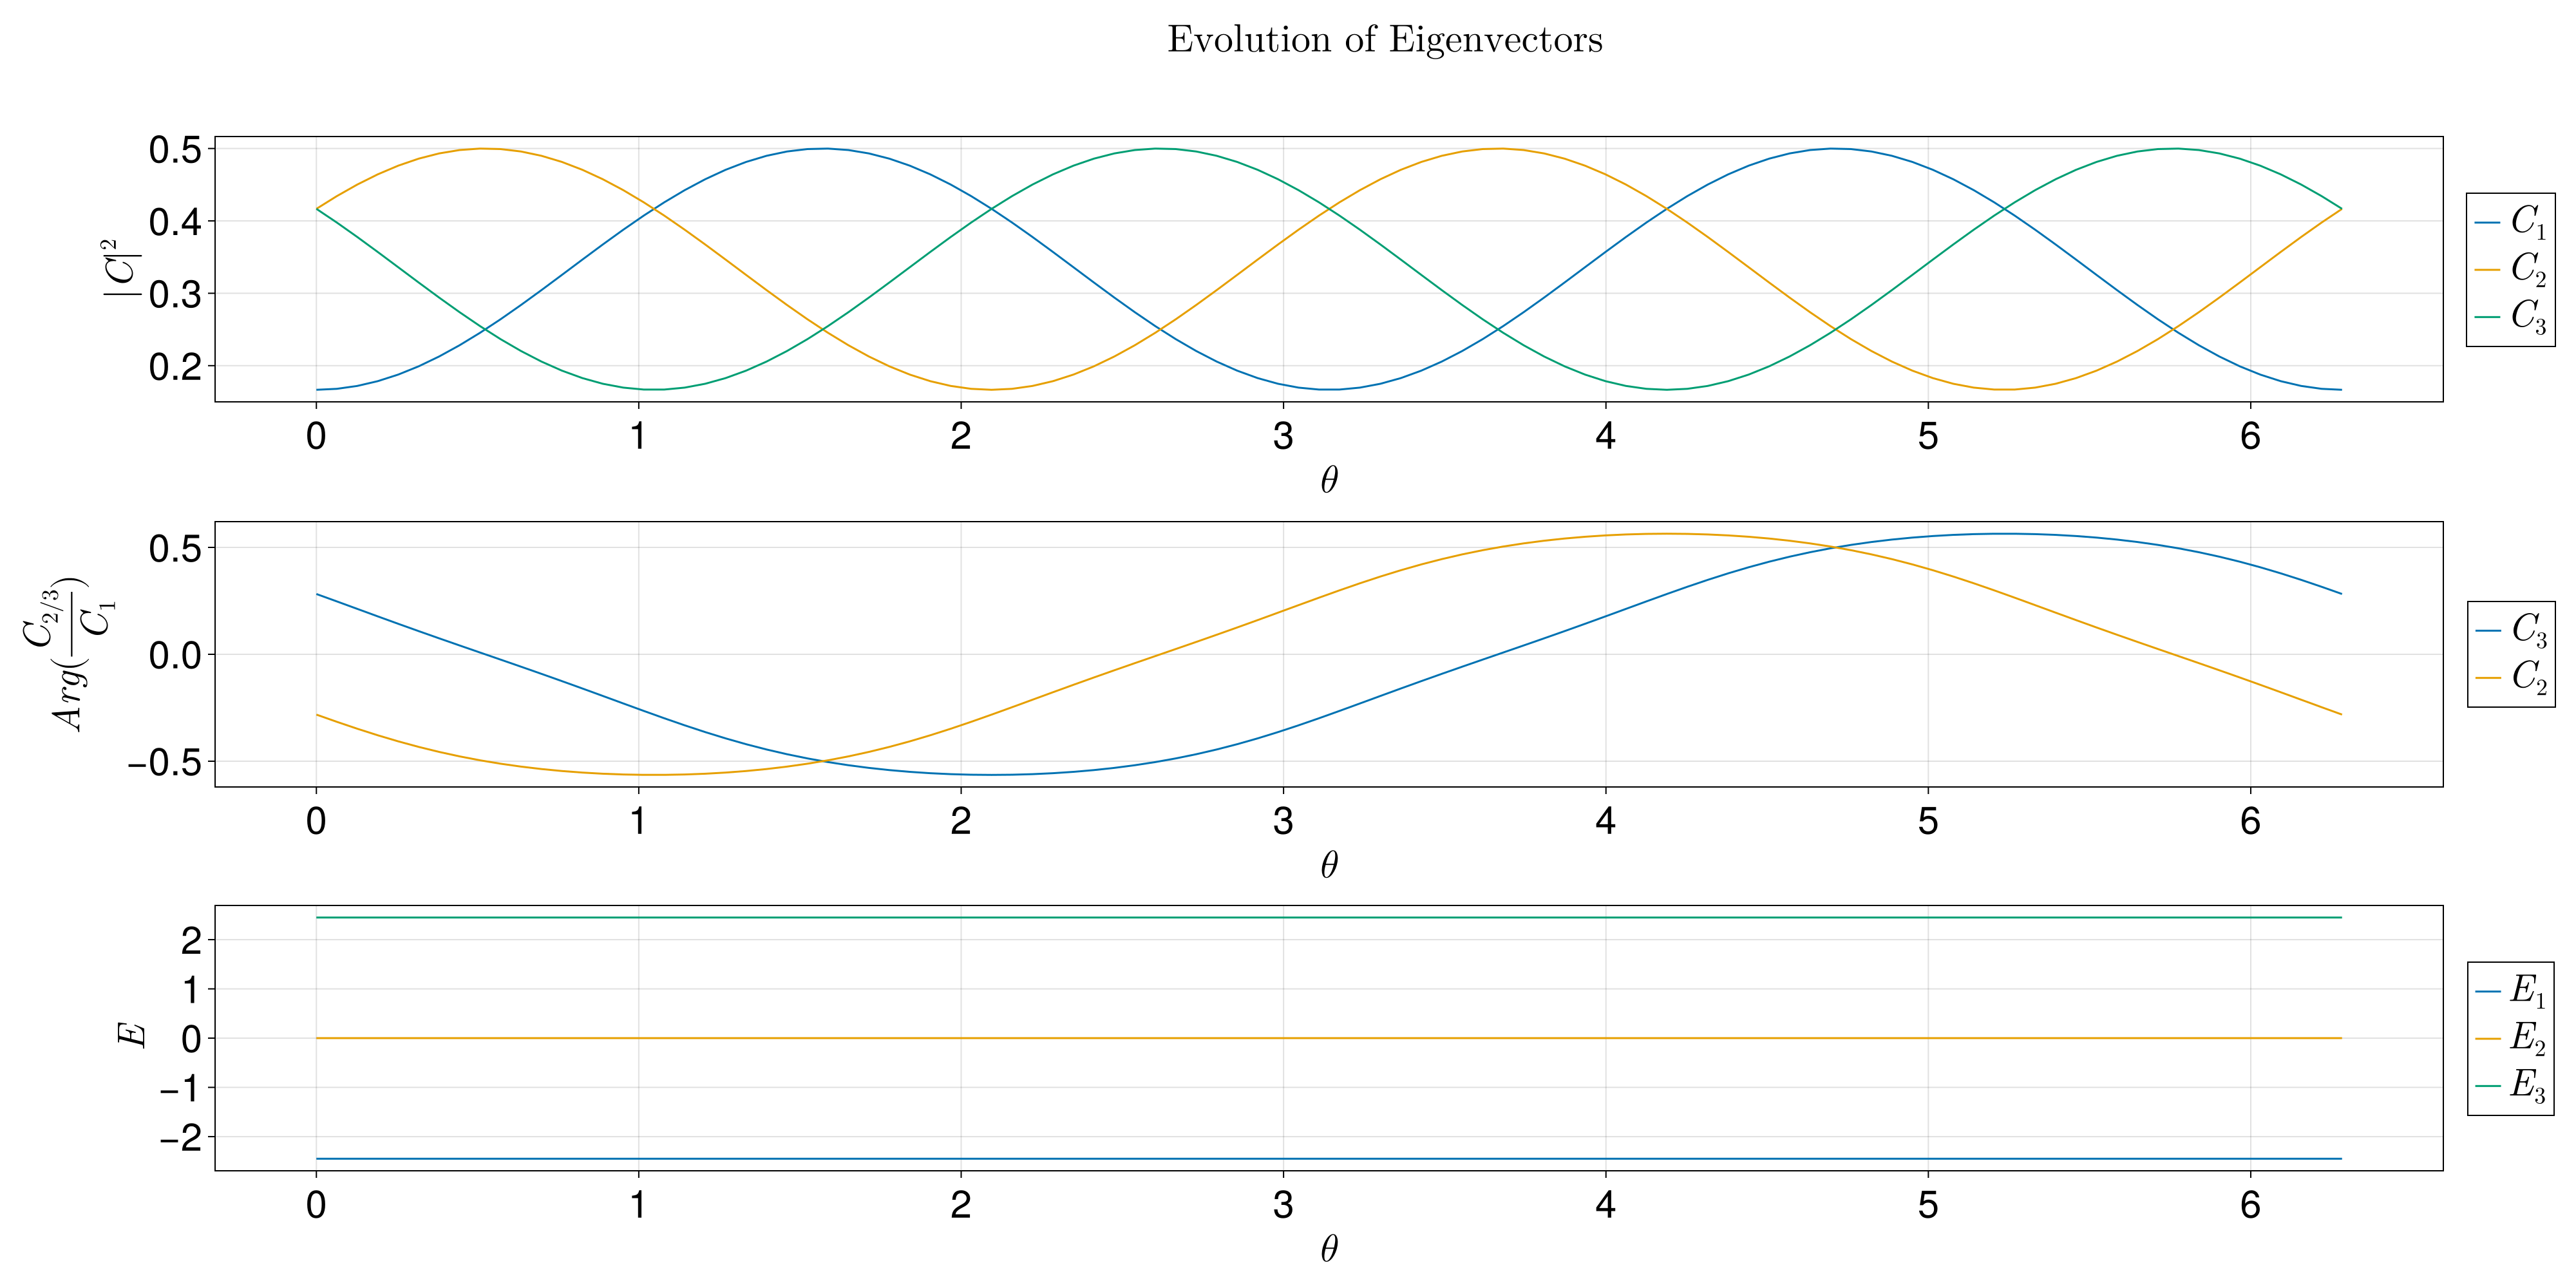

In [16]:
mf_coefs_no_spinor(p, kappa, alpha, delta)

In [17]:
function mf_bc_no_spinor(kappa, vF, delta, alpha, w, p, theta, pd)
    x = p * cos(theta)
    y = p * sin(theta)

    spacing = 10^(-4) * (p * kappa / pd)
    grid = reshape([x, y], (1, 2))

    plot_list = range(-1, 1, 1000)
    alpha_list = plot_list * alpha

    
    curvature_ns = Array{Float64}(undef, length(alpha_list))
    for i in 1:length(alpha_list)
        alph = alpha_list[i]
        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alph)
        curvature_ns[i] = ct[1]
    end

    # create plot
    P = Figure(size=(2000, 1000), fontsize=30)

    ax1 = Axis(P[1, 1], title = L"\Omega \text{ vs } \alpha", xlabel = L"\alpha", ylabel = L"\Omega")
    lines!(ax1, plot_list, log10.(abs.(curvature_ns) .+ 1e-16))
    P
end

mf_bc_no_spinor (generic function with 1 method)

In [18]:
# parameters
kappa = 1
vF = 0
delta = -1e-1
alpha = 1 + 1im
w = 10^(-4) * kappa
p = 1
theta = 0
pd = 50

50

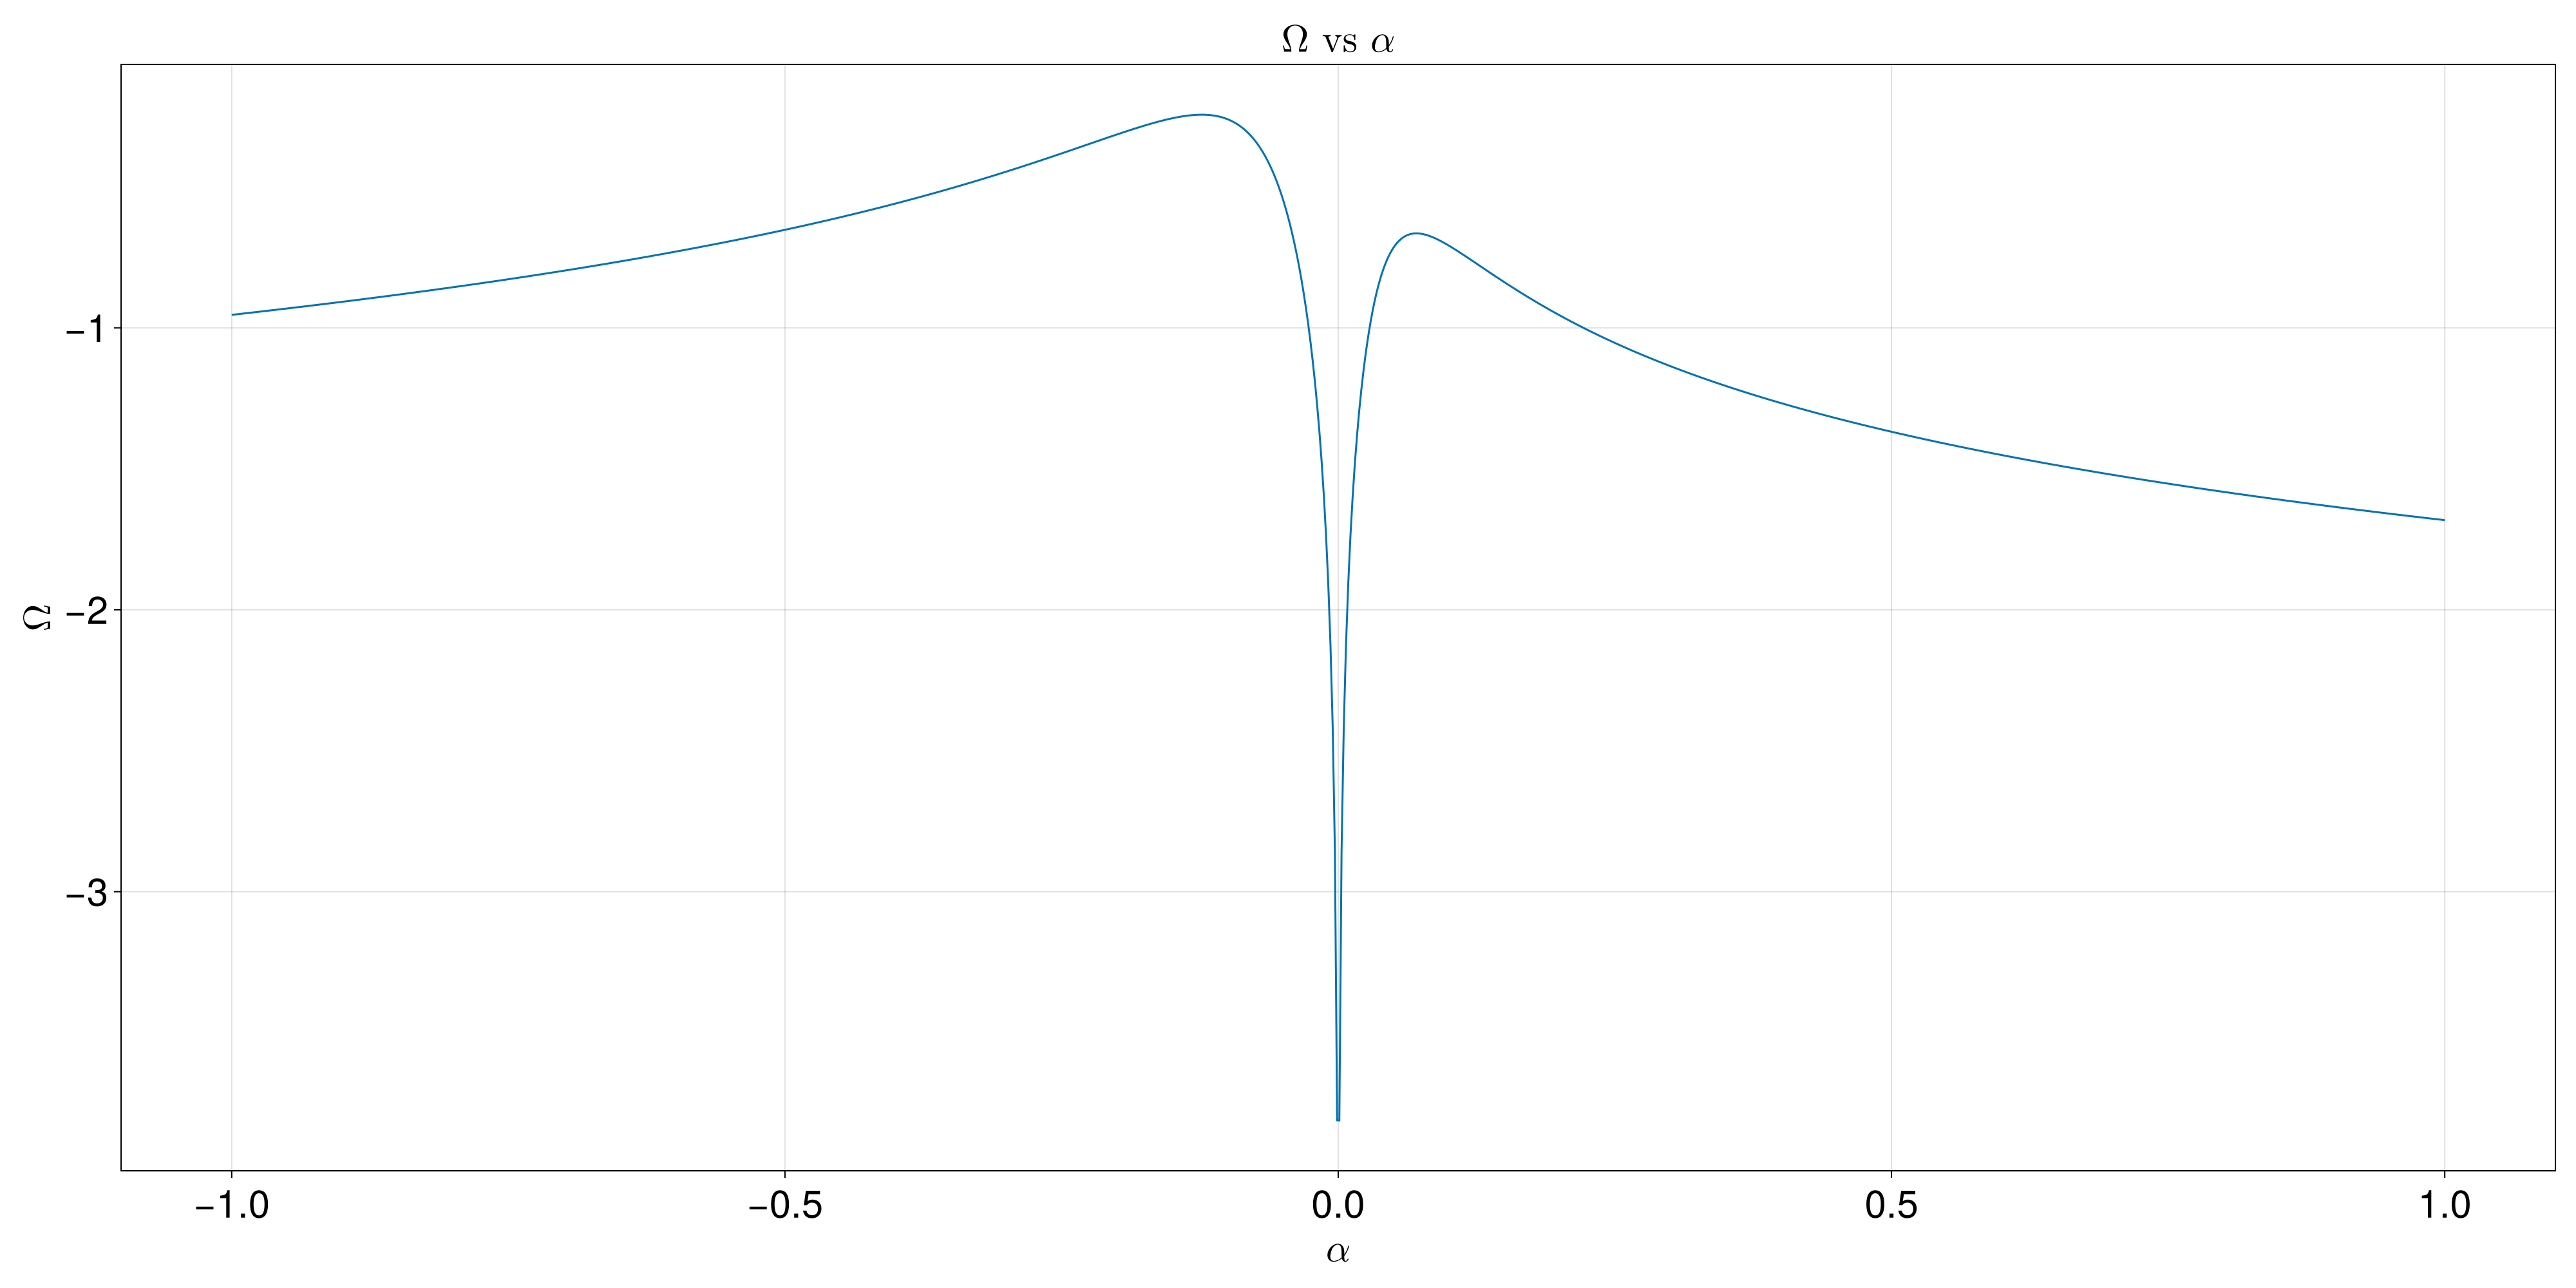

In [19]:
mf_bc_no_spinor(kappa, vF, delta, alpha, w, p, theta, pd)

In [20]:
function p_oscillation_comps(kappa, vF, delta, p, theta, pd)
    x = p * cos(theta)
    y = p * sin(theta)

    spacing = 10^(-4) * (p * kappa / pd)
    grid = reshape([x, y], (1, 2))

    alpha_list = range(-10^3, 10^3, 1000)
    
    P_list_re = Array{ComplexF64}(undef, 4, length(alpha_list))
    P_list_im = Array{ComplexF64}(undef, 4, length(alpha_list))
    P_list_pure_re = Array{ComplexF64}(undef, length(alpha_list))
    P_list_pure_im = Array{ComplexF64}(undef, length(alpha_list))
    for i in 1:length(alpha_list)
        alpha1 = alpha_list[i] + 500im
        alpha2 = alpha_list[i] - (10^3)im
        alpha3 = alpha_list[i] - (10^4)im
        alpha4 = alpha_list[i] - (10^5)im
        
        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha1)
        P_list_re[1, i] = pt[1]

        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha2)
        P_list_re[2, i] = pt[1]

        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha3)
        P_list_re[3, i] = pt[1]

        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha4)
        P_list_re[4, i] = pt[1]


        alpha1 = alpha_list[i]im - (10^3)
        alpha2 = alpha_list[i]im - (10^4)
        alpha3 = alpha_list[i]im - (10^5)
        alpha4 = alpha_list[i]im - (10^6)
        
        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha1)
        P_list_im[1, i] = pt[1]

        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha2)
        P_list_im[2, i] = pt[1]

        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha3)
        P_list_im[3, i] = pt[1]

        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha4)
        P_list_im[4, i] = pt[1]


        alpha1 = alpha_list[i]im
        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha1)
        P_list_pure_im[i] = pt[1]

        alpha1 = alpha_list[i]
        ct, pt = bc_no_spinors(grid, spacing, vF, kappa, delta, alpha1)
        P_list_pure_re[i] = pt[1]
    end
    # create plot
    P = Figure(size=(2000, 1000), fontsize=30)
    # create and configure axes
    ax1 = Axis(P[1, 1], title = L"Re(\alpha) \text{ vs } Im(e^{-i \Omega \times area})", xlabel = L"Re(\alpha)", 
    ylabel = L"Im(e^{-i \Omega}\times area)")

    lines!(ax1, alpha_list, imag(P_list_re[1, :]), label = L"Im(\alpha) = -10^2")
    lines!(ax1, alpha_list, imag(P_list_re[2, :]), label = L"Im(\alpha) = -10^3")
    lines!(ax1, alpha_list, imag(P_list_re[3, :]), label = L"Im(\alpha) = -10^4")
    lines!(ax1, alpha_list, imag(P_list_re[4, :]), label = L"Im(\alpha) = -10^5")
    P[1, 2] = Legend(P, ax1, framevisible = true)


    ax1 = Axis(P[2, 1], title = L"Im(\alpha) \text{ vs } Im(e^{-i \Omega \times area})", xlabel = L"Im(\alpha)", 
    ylabel = L"Im(e^{-i \Omega\times area})")

    lines!(ax1, alpha_list, imag(P_list_im[1, :]), label = L"Re(\alpha) = -10^3")
    lines!(ax1, alpha_list, imag(P_list_im[2, :]), label = L"Re(\alpha) = -10^4")
    lines!(ax1, alpha_list, imag(P_list_im[3, :]), label = L"Re(\alpha) = -10^5")
    lines!(ax1, alpha_list, imag(P_list_im[4, :]), label = L"Re(\alpha) = -10^6")
    P[2, 2] = Legend(P, ax1, framevisible = true)

    P
end

p_oscillation_comps (generic function with 1 method)

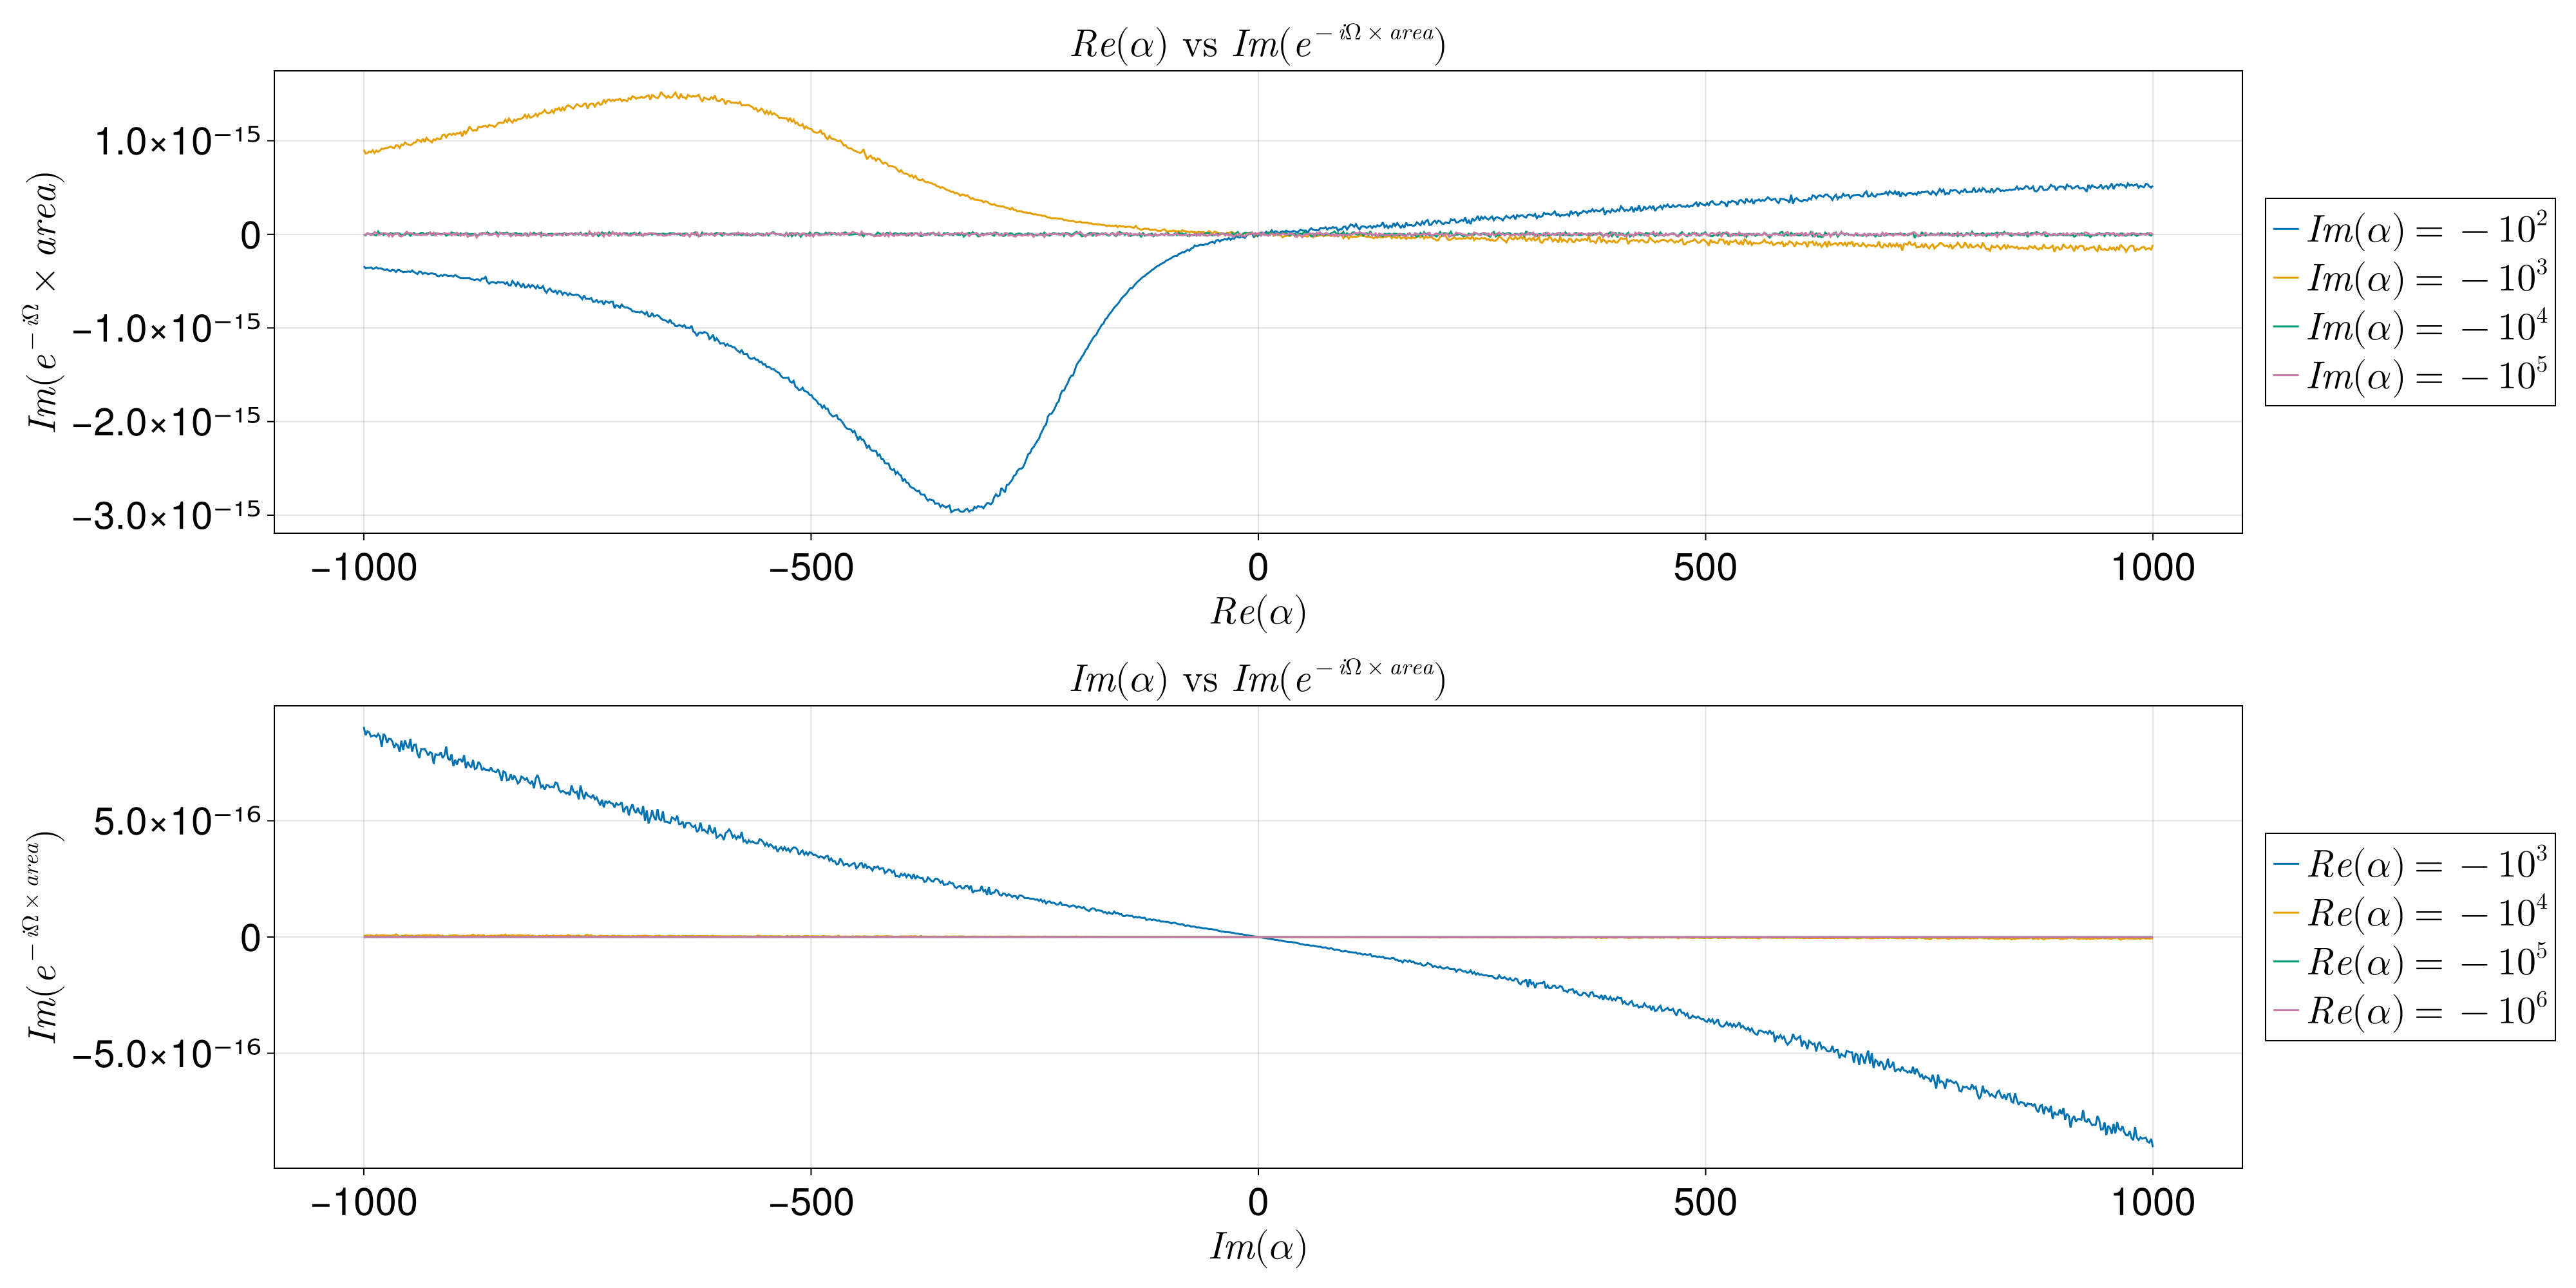

In [21]:
p_oscillation_comps(kappa, vF, delta, p, theta, pd)